<a href="https://colab.research.google.com/github/JackGallagher41/IDS/blob/main/Project_3_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Jack Gallagher**

October 6, 2023

Project 3




Life Expectancy: Statistical Analysis on Factors Influencing Life Expectancy
---

**Insights**

The data-set aims to answer the following key questions:

1. Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy?
2. Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?
3. How does Adult mortality rates affect life expectancy?
4. Does Life Expectancy have positive or negative correlation with eating habits, social factors, drinking alcohol, etc.?
5. What is the impact of schooling on the lifespan of humans?
6. Does Life Expectancy have positive or negative relationship with drinking alcohol?
7. Do densely populated countries tend to have lower life expectancy?

## **1.Delete all rows with population = 0. Perform further data cleaning for other attributes, as necessary.**

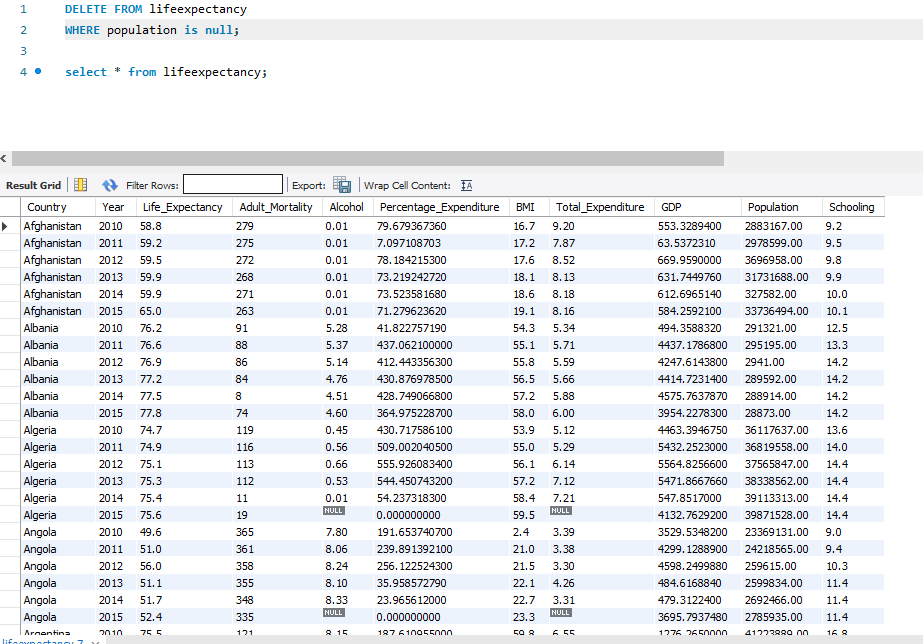

Deleted all rows with 0 population in order to help clean data

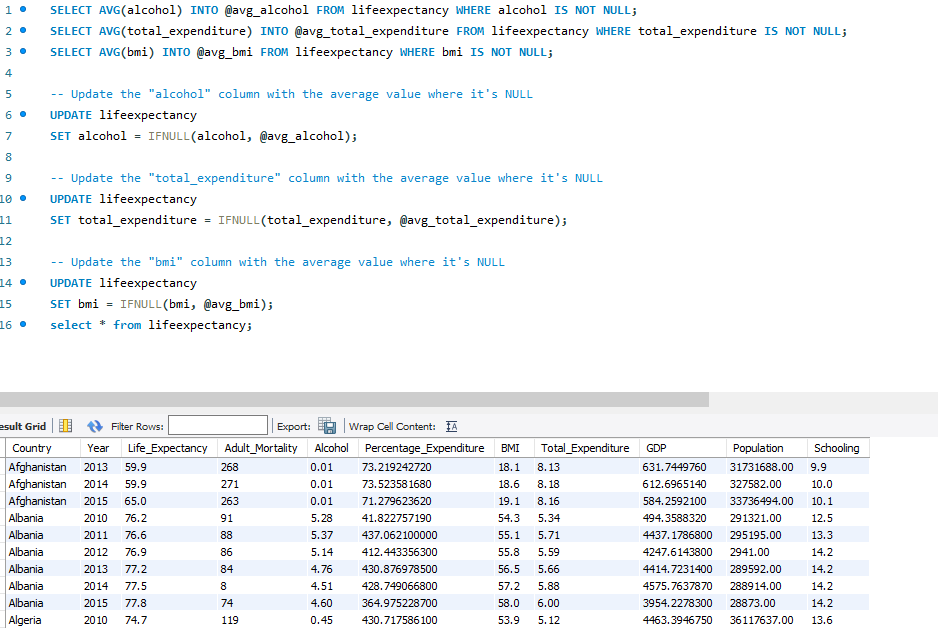

I then followed it up by changing null values in other rows to their averages. Had to use @avg_column due to mysql errors.

## **2.Display total count of countries after data cleaning.**

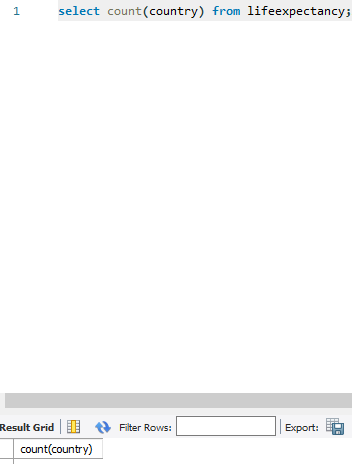

Amount of countries after clearing null population rows.

## **3. List of countries with the highest and lowest average mortality rates (years 2010-2015)**

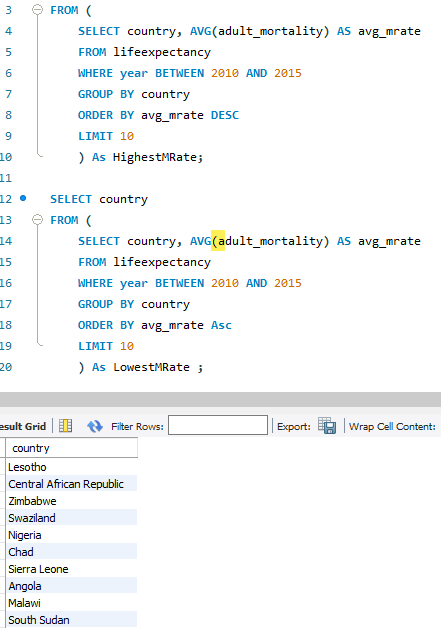

Takes a list of top 10 highest and lowest mortality rates in countries between 2010-2015

## **4. List of countries with the highest and lowest average population (years 2010-2015)**

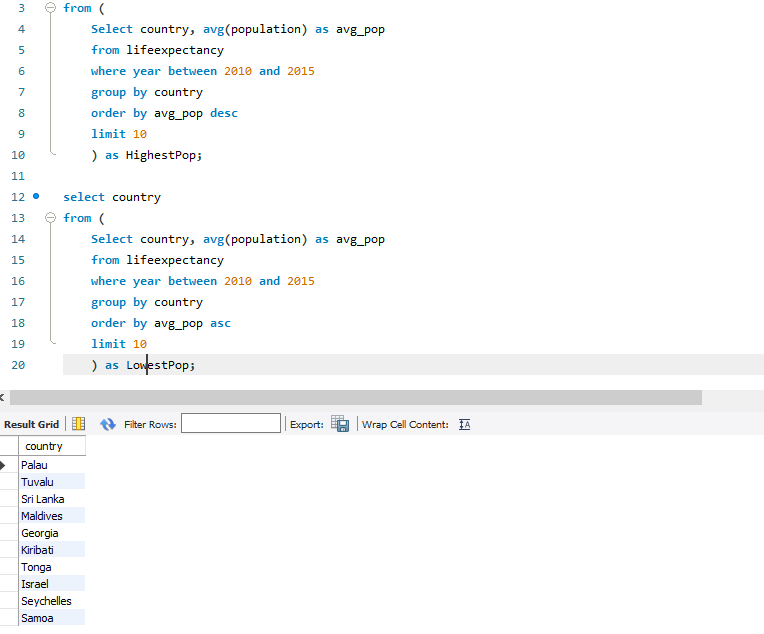

Takes a list of the 10 highest and lowest population average for countries between 2010-2015

## **5. List of countries with the highest and lowest average GDP (years 2010-2015)**

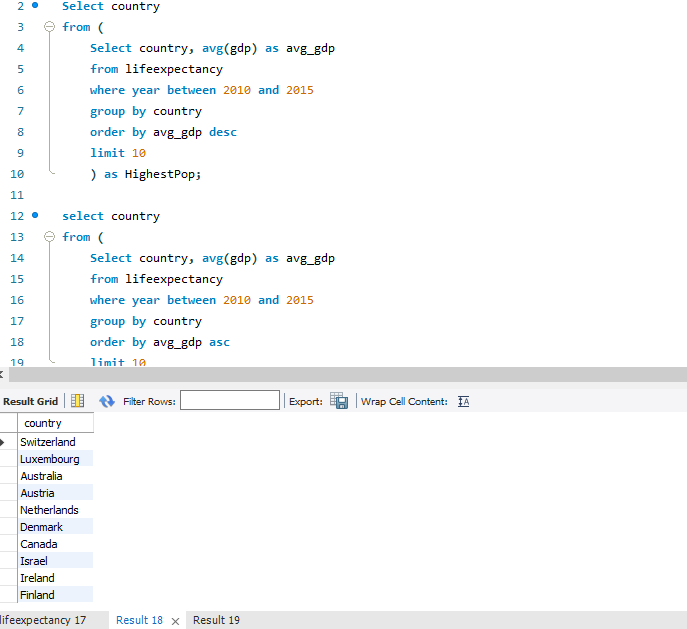

Takes a list of the 10 highest and lowest gdp average for countries between 2010-2015

## **6. List of countries with the highest and lowest average Schooling  (years 2010-2015)**

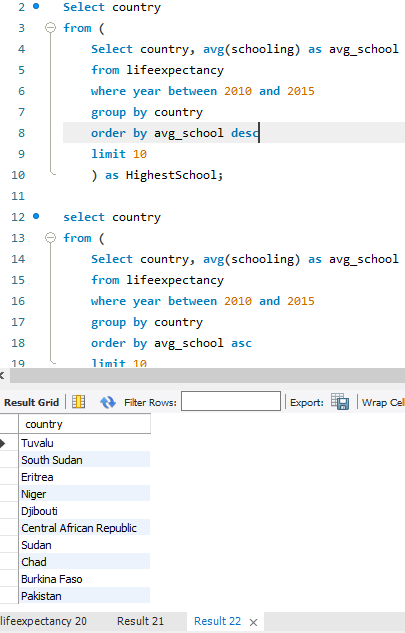

Takes a list of the 10 highest and lowest schooling average for countries between 2010-2015

## **7. Which countries have the highest and lowest average alcohol consumption (years 2010-2015)?**

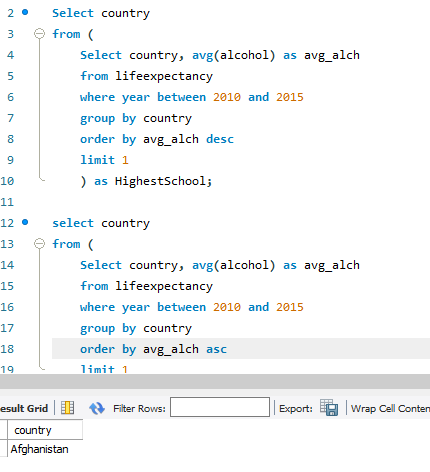

Found the highest and lowest alcohol consumption which were Afghanistan (lowest) and Belarus (highest)

## **8. Do densely populated countries tend to have lower life expectancy?**

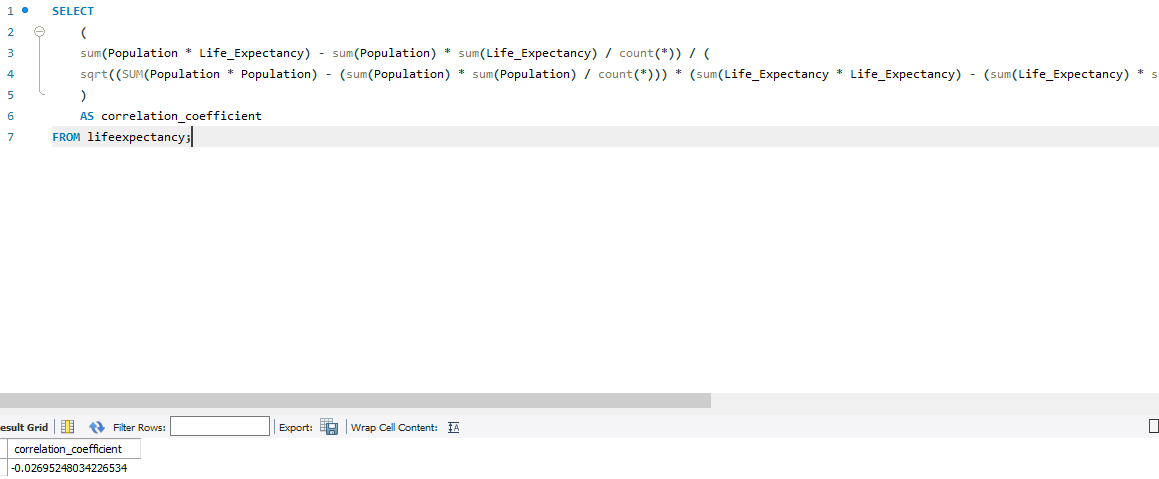

Since MySQL doesn't support correlation function we put in the calculations as such above to get the calculation.
Since the correlation between the 2 shows -0.3 it is safe to assume that they hold no correlation meaning densely populated countries dont tend to have lower life expectancies.

# **Python**

First we import libraries needed, get the raw file and read it while seperating by commas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/bforoura/IDS/main/HW3/Life_Expectancy.csv"

lifeExpectancyDF = pd.read_csv(url, sep=",")

In [3]:
lifeExpectancyDF

,Country,Year,Life_Expectancy,Adult_Mortality,Alcohol,Percentage_Expenditure,BMI,Total_Expenditure,GDP,Population,Schooling
0,Afghanistan,2010,58.8,279.0,0.01,79.679367,16.7,9.20,553.328940,2883167.0,9.2
1,Afghanistan,2011,59.2,275.0,0.01,7.097109,17.2,7.87,63.537231,2978599.0,9.5
2,Afghanistan,2012,59.5,272.0,0.01,78.184215,17.6,8.52,669.959000,3696958.0,9.8
3,Afghanistan,2013,59.9,268.0,0.01,73.219243,18.1,8.13,631.744976,31731688.0,9.9
4,Afghanistan,2014,59.9,271.0,0.01,73.523582,18.6,8.18,612.696514,327582.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...
1103,Zimbabwe,2011,54.9,464.0,6.00,63.750530,29.9,6.31,839.927936,14386649.0,10.1
1104,Zimbabwe,2012,56.6,429.0,6.09,92.602336,3.3,6.69,955.648466,1471826.0,9.8
1105,Zimbabwe,2013,58.0,399.0,6.39,10.666707,3.8,6.88,111.227396,155456.0,10.4
1106,Zimbabwe,2014,59.2,371.0,6.50,10.822595,31.3,6.44,127.474620,15411675.0,10.3


First I start by dropping any rows in which population is 0. I then use an array of each column and fill any empty values with the average.

In [4]:
lifeExpectancyDF = lifeExpectancyDF.dropna(subset=['Population'])

In [12]:
column_names = ['Adult_Mortality', 'Alcohol', 'Percentage_Expenditure',
                   ' BMI ', 'Total_Expenditure', 'GDP', 'Schooling'];

for column in column_names:
  lifeExpectancyDF[column] = lifeExpectancyDF[column].fillna(lifeExpectancyDF[column].mean());

<ipython-input-12-11efc8b552af>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lifeExpectancyDF[column] = lifeExpectancyDF[column].fillna(lifeExpectancyDF[column].mean());


## **How does Adult mortality rates affect life expectancy?**

In [10]:
correlation=lifeExpectancyDF['Adult_Mortality'].corr(lifeExpectancyDF['Life_Expectancy '])

correlation

-0.7487395522482938

Adult mortality rates and life expectancy have a strong negative correlation so higher adult mortality is lower life expectancy

## **Does life expectancy have positive or negative correlation with eating habits, drinking alcohol, social factors, and economic factors?**

In [13]:
correlation=lifeExpectancyDF[' BMI '].corr(lifeExpectancyDF['Life_Expectancy'])

correlation

0.5218131014609677

Eating habits has a positive correlation

In [14]:
correlation=lifeExpectancyDF['Alcohol'].corr(lifeExpectancyDF['Life_Expectancy'])

correlation

0.4364306174121324

Alcohol holds a positive correlation

In [15]:
correlation=lifeExpectancyDF['Population'].corr(lifeExpectancyDF['Life_Expectancy'])

correlation

-0.03348854643560358

Population has no correlation

In [19]:
correlation = lifeExpectancyDF['Percentage_Expenditure'].corr(lifeExpectancyDF['Life_Expectancy '])

correlation

0.3848071725273011

In [21]:
correlation = lifeExpectancyDF['Total_Expenditure'].corr(lifeExpectancyDF['Life_Expectancy '])

correlation

0.23536379878485597

In [22]:
correlation = lifeExpectancyDF['GDP'].corr(lifeExpectancyDF['Life_Expectancy '])

correlation

0.4657830666220294

All economic factors hold a positive correlation

## **What is the impact of schooling on the lifespan of humans?**

In [25]:
correlation=lifeExpectancyDF['Schooling'].corr(lifeExpectancyDF['Life_Expectancy '])

correlation

0.7956806049403572

Schooling has a positive correlation so more schooling is showing a longer life span

## **Create and plot several linear regression models for life expectancy (as the dependent variable) and the independent variables that had the highest correlation with life expectancy as found in your correlation analysis.**

**Life Expectancy and Schooling - .7958**

<Axes: xlabel='Schooling', ylabel='Life_Expectancy '>

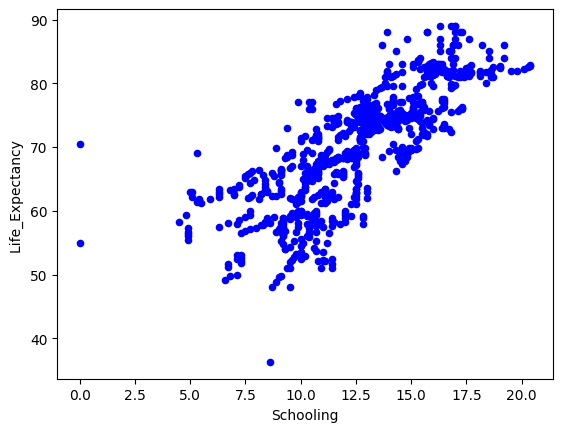

In [28]:
lifeExpectancyDF.plot.scatter(x='Schooling', y='Life_Expectancy ', color="Blue")

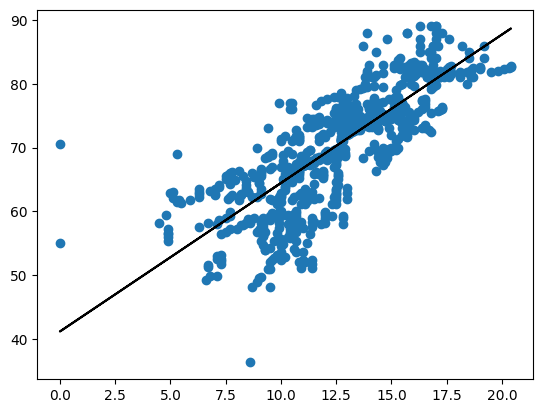

In [36]:
#Regression Line Schooling

from sklearn.linear_model import LinearRegression


X = lifeExpectancyDF[['Schooling']]
Y = lifeExpectancyDF[['Life_Expectancy ']]

schooling_LinearReg = LinearRegression()
schooling_LinearReg.fit(X, Y)

Prediction = schooling_LinearReg.predict(X)

plt.scatter(X, Y)
plt.plot(X, Prediction, color='Black')
plt.show()

**Life Expectancy and BMI - .5218**

<Axes: xlabel=' BMI ', ylabel='Life_Expectancy '>

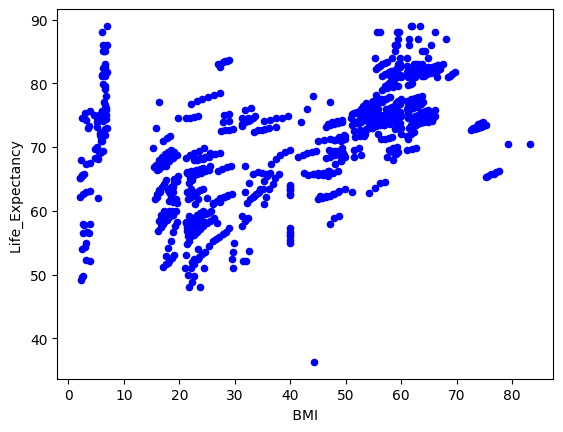

In [42]:
lifeExpectancyDF.plot.scatter(x=' BMI ', y='Life_Expectancy ', color="Blue")

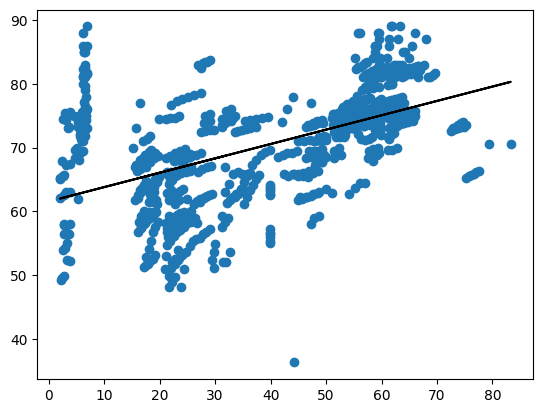

In [52]:
#Regression Line BMI

from sklearn.linear_model import LinearRegression

X = lifeExpectancyDF[[' BMI ']]
Y = lifeExpectancyDF[['Life_Expectancy ']]

BMI_LinearReg = LinearRegression()
BMI_LinearReg.fit(X, Y)

Prediction = BMI_LinearReg.predict(X)

plt.scatter(X, Y)
plt.plot(X, Prediction, color='Black')
plt.show()

**Life Expenctancy and GDP - .4658**

<Axes: xlabel='GDP', ylabel='Life_Expectancy '>

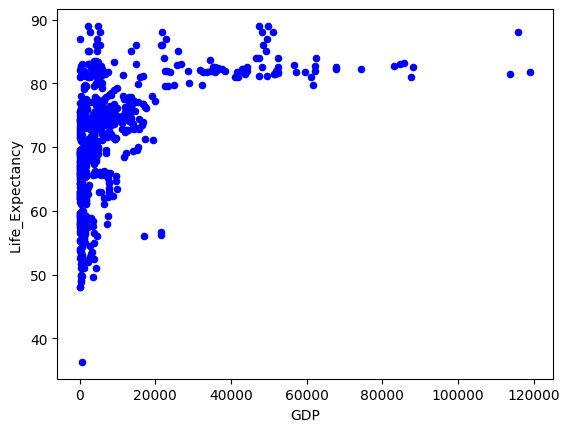

In [41]:
lifeExpectancyDF.plot.scatter(x='GDP', y='Life_Expectancy ', color="Blue")

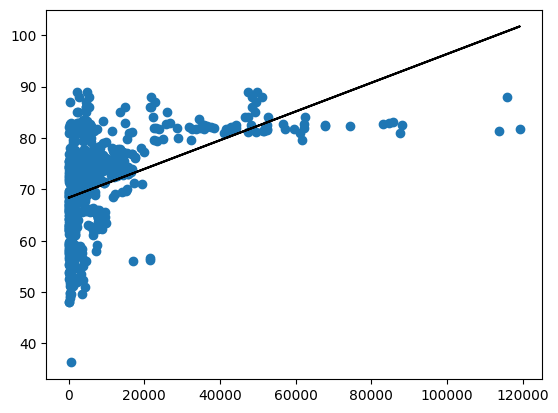

In [39]:
# Regression Line GDP

from sklearn.linear_model import LinearRegression

X = lifeExpectancyDF[['GDP']]
Y = lifeExpectancyDF[['Life_Expectancy ']]

GDP_LinearReg = LinearRegression()
GDP_LinearReg.fit(X, Y)

Prediction = GDP_LinearReg.predict(X)

plt.scatter(X, Y)
plt.plot(X, Prediction, color='Black')
plt.show()

## **Provide the equation of each model and compute their R2 and MSE values.**

**Schooling - Formula, R2 and MSE**

In [56]:
from sklearn.metrics import mean_squared_error, r2_score

SchoolingSlope=schooling_LinearReg.coef_
SchoolingIntercept=schooling_LinearReg.intercept_

print("Schooling Slope= " , SchoolingSlope);
print("Schooling Intercept= " , SchoolingIntercept);

print("Life Expectancy = " , SchoolingSlope , " * Schooling + " , SchoolingIntercept);

prediction_schooling = schooling_LinearReg.predict(lifeExpectancyDF[['Schooling']])

print("Schooling MSE= ", mean_squared_error(lifeExpectancyDF[['Life_Expectancy ']], prediction_schooling))
print("Schooling R2= ", r2_score(lifeExpectancyDF[['Life_Expectancy ']], prediction_schooling))

Schooling Slope=  [[2.32908997]]
Schooling Intercept=  [41.1572771]
Life Expectancy =  [[2.32908997]]  * Schooling +  [41.1572771]
Schooling MSE=  28.940817002360802
Schooling R2=  0.6331076250782535


**BMI - Formula, R2 and MSE**

In [57]:
from sklearn.metrics import mean_squared_error, r2_score

BMISlope=BMI_LinearReg.coef_;
BMIIntercept=BMI_LinearReg.intercept_;

print("BMI Slope= " , BMISlope);
print("BMI Intercept= " , BMIIntercept);

print("Life Expectancy = " , BMISlope , " * BMI + " , BMIIntercept);

prediction_BMI = BMI_LinearReg.predict(lifeExpectancyDF[[' BMI ']])

print("BMI MSE= ", mean_squared_error(lifeExpectancyDF[['Life_Expectancy ']], prediction_BMI))
print("BMI R2= ", r2_score(lifeExpectancyDF[['Life_Expectancy ']], prediction_BMI))

BMI Slope=  [[0.22526675]]
BMI Intercept=  [61.55453621]
Life Expectancy =  [[0.22526675]]  * BMI +  [61.55453621]
BMI MSE=  57.402537755401404
BMI R2=  0.2722889128563142


**GDP - Formula, R2 and MSE**

In [58]:
from sklearn.metrics import mean_squared_error, r2_score

GDPSlope=GDP_LinearReg.coef_;
GDPIntercept=GDP_LinearReg.intercept_

print("GDP Slope= " , GDPSlope);
print("GDP Intercept= " , GDPIntercept);

print("Life Expectancy = " , GDPSlope , " * GDP + " , GDPIntercept);

prediction_GDP = GDP_LinearReg.predict(lifeExpectancyDF[['GDP']])

print("GDP MSE= ", mean_squared_error(lifeExpectancyDF[['Life_Expectancy ']], prediction_GDP))
print("GDP R2= ", r2_score(lifeExpectancyDF[['Life_Expectancy ']], prediction_GDP))

GDP Slope=  [[0.00027974]]
GDP Intercept=  [68.37508248]
Life Expectancy =  [[0.00027974]]  * GDP +  [68.37508248]
GDP MSE=  61.76741857303677
GDP R2=  0.2169538651518219


## **Summarize your findings and explain which model performs the best.**

After figuring out the top 3 highest correlations we were able to find the Slope, Intercept, Formula, MSE, R2, Linear Regression Line and Scatter Plot of each. Schooling holds the lowest MSE and highest R2 making it the best fit model with Life Expectancy. GDP held the lowest R2 and highest MSE making it the worst fit out of the 3.

## **Insights Not Yet Mentioned**

*Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy?*


When looking at the data not all initially predicted variables hold correlation with population not holding any correlation.
All other columns hold some sort of weak or strong correlation.

*Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?*


The data shows that life expendancy has a slight increase in correlation so it would be good for them to improve its healthcare expenditure